# Investigating NGC1851
- This notebook aims to use the gaia subset obtained initially to verify that globuluar clusters can be located and the relative population size and span of characterisitcs

In [92]:
from Analysis import reddening_correction

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits

# NGC1851

### Loading the data

In [94]:
# Loading the data
NGC1851_path = 'data/NGC1851.fits'
with fits.open(NGC1851_path) as NGC1851_hdul:
    NGC1851_data = Table(NGC1851_hdul[1].data).to_pandas()
    display(NGC1851_data.describe())

source_id            l            b           ra          dec  \
count  1.556000e+03  1556.000000  1556.000000  1556.000000  1556.000000   
mean   4.819218e+18   244.512356   -35.032803    78.531781   -40.045076   
std    3.389424e+14     0.291847     0.241542     0.318403     0.236637   
min    4.813198e+18   243.300224   -36.012227    77.266187   -40.974432   
25%    4.819186e+18   244.463531   -35.075800    78.475648   -40.086456   
50%    4.819198e+18   244.510776   -35.034981    78.528571   -40.044486   
75%    4.819278e+18   244.561457   -34.992216    78.585080   -40.005696   
max    4.820132e+18   245.674029   -34.041557    79.810544   -39.063765   

          ra_error    dec_error  phot_g_mean_mag  phot_bp_mean_mag  \
count  1556.000000  1556.000000      1556.000000       1556.000000   
mean      0.239113     0.281069        19.147257         19.405455   
std       0.146798     0.170187         1.398358          1.385915   
min       0.008386     0.009561        12.838944         13.680194   
25%       0.132300     0.155592        18.830636         19.009151   
50%       0.232414     0.267751        19.596885         19.792589   
75%       0.334555     0.401106        20.099051         20.368653   
max       1.432029     1.394227        20.499794         21.507374   

       phot_rp_mean_mag  ...        pmdec   pmra_error  pmdec_error  \
count       1556.000000  ...  1556.000000  1556.000000  1556.000000   
mean          18.588825  ...    -0.479193     0.318439     0.361011   
std            1.463274  ...     0.946423     0.198642     0.223918   
min           11.945064  ...    -3.582162     0.010704     0.011986   
25%           18.187841  ...    -0.870208     0.170363     0.197739   
50%           19.048800  ...    -0.608378     0.308832     0.336770   
75%           19.582033  ...    -0.231307     0.442030     0.508868   
max           21.080069  ...     3.846972     2.063027     1.641008   

       radial_velocity        bp_rp  r_med_photogeo  r_hi_photogeo  \
count        16.000000  1556.000000     1556.000000    1556.000000   
mean        323.048706     0.816629     8650.935547   10863.316406   
std           2.747808     0.277047     3459.191650    4262.117188   
min         317.262238    -0.430410      498.914032     570.630432   
25%         321.022491     0.674499     6319.802368    7922.189331   
50%         323.878632     0.771539     8953.134277   11139.869629   
75%         324.855774     0.928740    10973.090820   13589.109619   
max         327.434753     2.321491    22791.949219   31591.839844   

       r_lo_photogeo  logg_gspphot  teff_gspphot  
count    1556.000000    375.000000    375.000000  
mean     6848.571777      4.270065   5674.109375  
std      2877.097412      0.720252   1160.812256  
min       436.116791      1.452500   4315.515137  
25%      4775.280762      3.819700   5182.791504  
50%      7163.211670      4.694100   5476.729980  
75%      8738.506104      4.743800   5785.103027  
max     20499.656250      4.875100  15094.532227  

[8 rows x 23 columns]

In [95]:
# ---------------- Proper Motion Selection ----------------
pmra_lim_lo, pmra_lim_hi = 2.0, 2.35
pmdec_lim_lo, pmdec_lim_hi = -0.8, -0.5

/var/folders/ps/rqln7sh519b4cnjyq2mm94s40000gn/T/ipykernel_16009/2124373964.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()



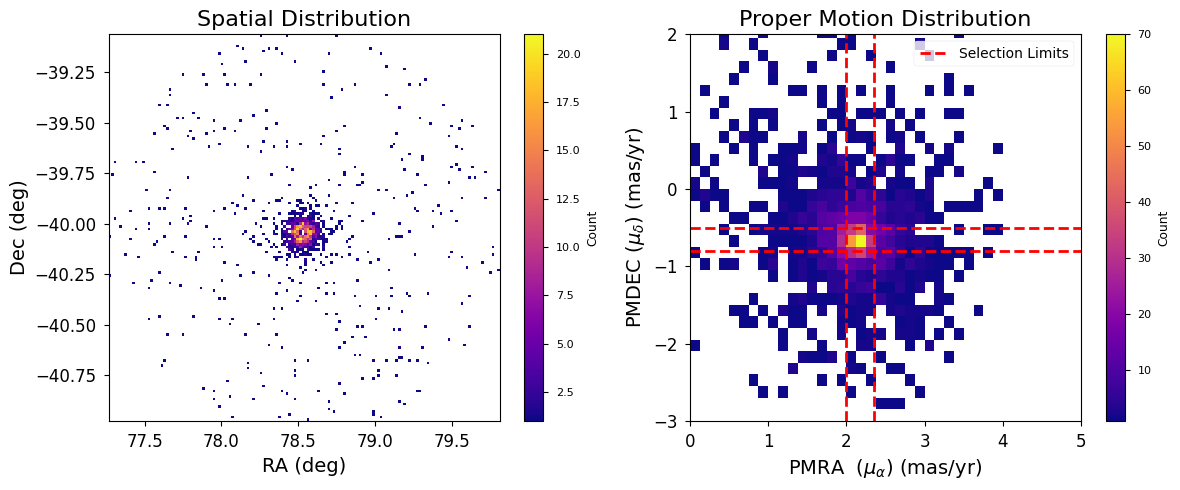

In [96]:
plt.style.use("seaborn-v0_8-paper")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ------------ RA vs Dec ------------
h1 = axes[0].hist2d(NGC1851_data.ra, NGC1851_data.dec, bins=150, cmin=1, cmap="plasma")
fig.colorbar(h1[3], ax=axes[0], label="Count")
axes[0].tick_params(axis='both', labelsize=12)
axes[0].set_xlabel("RA (deg)", fontsize=14)
axes[0].set_ylabel("Dec (deg)", fontsize=14)
axes[0].set_title("Spatial Distribution", fontsize=16)


# ------------ Proper Motion ------------
h2 = axes[1].hist2d(
    NGC1851_data.pmra, NGC1851_data.pmdec, bins=800, cmin=1, range=[[-50, 50], [-60, 60]], cmap="plasma"
)
fig.colorbar(h2[3], ax=axes[1], label="Count")
axes[1].set_xlabel(r"PMRA  ($\mu_{\alpha}$) (mas/yr)", fontsize=14)
axes[1].set_ylabel(r"PMDEC ($\mu_{\delta}$) (mas/yr)", fontsize=14)
axes[1].set_title("Proper Motion Distribution", fontsize=16)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_xlim(0, 5)
axes[1].set_ylim(-3, 2)
axes[1].axvline(pmra_lim_lo, color="red", linestyle="--", linewidth=2, label="Selection Limits")
axes[1].axvline(pmra_lim_hi, color="red", linestyle="--", linewidth=2)
axes[1].axhline(pmdec_lim_lo, color="red", linestyle="--", linewidth=2)
axes[1].axhline(pmdec_lim_hi, color="red", linestyle="--", linewidth=2)
axes[1].legend(fontsize=10)


plt.tight_layout()
plt.show()

In [97]:
# Applying reddening correction
NGC1851_data_dered = reddening_correction(NGC1851_data)

# Describe both to see differences
NGC1851_data_dered[["phot_bp_mean_mag","dered_BP", "phot_rp_mean_mag", "dered_RP", "phot_g_mean_mag", "dered_G"]].describe()


phot_bp_mean_mag     dered_BP  phot_rp_mean_mag     dered_RP  \
count       1556.000000  1556.000000       1556.000000  1556.000000   
mean          19.405455    19.300745         18.588825    18.527466   
std            1.385915     1.384762          1.463274     1.462808   
min           13.680194    13.579979         11.945064    11.882760   
25%           19.009151    18.898903         18.187841    18.131473   
50%           19.792589    19.682511         19.048800    18.987837   
75%           20.368653    20.264907         19.582033    19.521297   
max           21.507374    21.406126         21.080069    21.016550   

       phot_g_mean_mag      dered_G  
count      1556.000000  1556.000000  
mean         19.147257    19.062744  
std           1.398358     1.396969  
min          12.838944    12.762593  
25%          18.830636    18.748111  
50%          19.596885    19.513703  
75%          20.099051    20.012578  
max          20.499794    20.429035

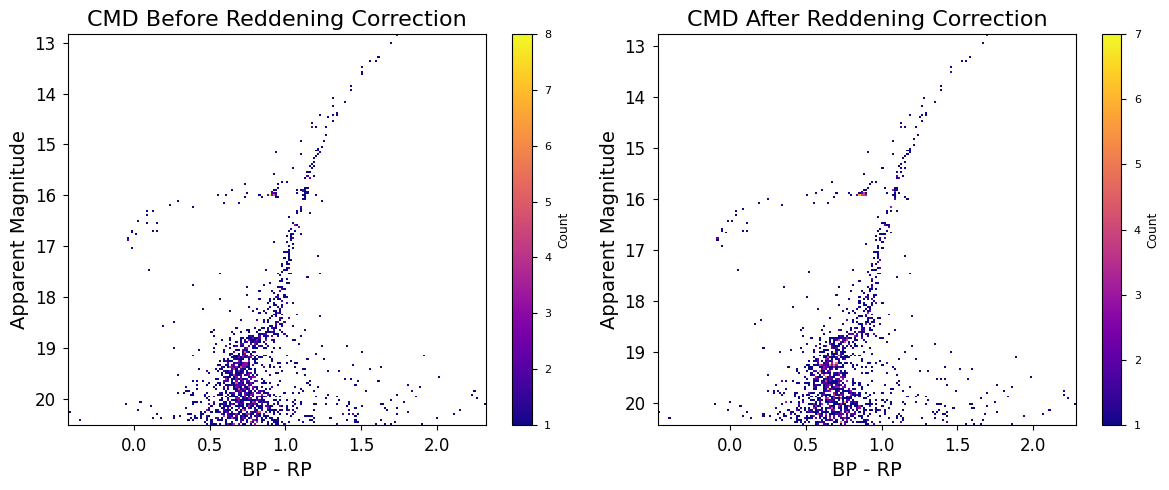

In [98]:
plt.style.use("seaborn-v0_8-paper")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
bp_rp_before = NGC1851_data.phot_bp_mean_mag - NGC1851_data.phot_rp_mean_mag
bp_rp_after = NGC1851_data_dered.dered_BP - NGC1851_data_dered.dered_RP
g_before = NGC1851_data.phot_g_mean_mag
g_after = NGC1851_data_dered.dered_G

# ------------ CMD Before Reddening Correction ------------
h1 = axes[0].hist2d(bp_rp_before, g_before, bins=200, cmin=1, cmap="plasma")
fig.colorbar(h1[3], ax=axes[0], label="Count")
axes[0].tick_params(axis="both", labelsize=12)
axes[0].set_xlabel("BP - RP", fontsize=14)
axes[0].set_ylabel("Apparent Magnitude", fontsize=14)
axes[0].set_title("CMD Before Reddening Correction", fontsize=16)
axes[0].invert_yaxis() 

# ------------ CMD After Reddening Correction ------------
h2 = axes[1].hist2d(bp_rp_after, g_after, bins=200, cmin=1, cmap="plasma")
fig.colorbar(h2[3], ax=axes[1], label="Count")
axes[1].tick_params(axis="both", labelsize=12)
axes[1].set_xlabel("BP - RP", fontsize=14)
axes[1].set_ylabel("Apparent Magnitude", fontsize=14)  # Fixed incorrect label
axes[1].set_title("CMD After Reddening Correction", fontsize=16)
axes[1].invert_yaxis()  

plt.tight_layout()
plt.show()



### Calculate Absolute Magnitude from Bailer Jones Distances

In [99]:
NGC1851_data_dered["abs_G"] = NGC1851_data_dered.dered_G - 5 * np.log10(NGC1851_data_dered.r_med_photogeo) + 5

### Identifying Cluster Stars based on Proper Motions

In [100]:
NGC1851_pm_filtered = NGC1851_data_dered[
    (NGC1851_data_dered.pmra > pmra_lim_lo) & (NGC1851_data_dered.pmra < pmra_lim_hi) &
    (NGC1851_data_dered.pmdec > pmdec_lim_lo) & (NGC1851_data_dered.pmdec < pmdec_lim_hi)
]

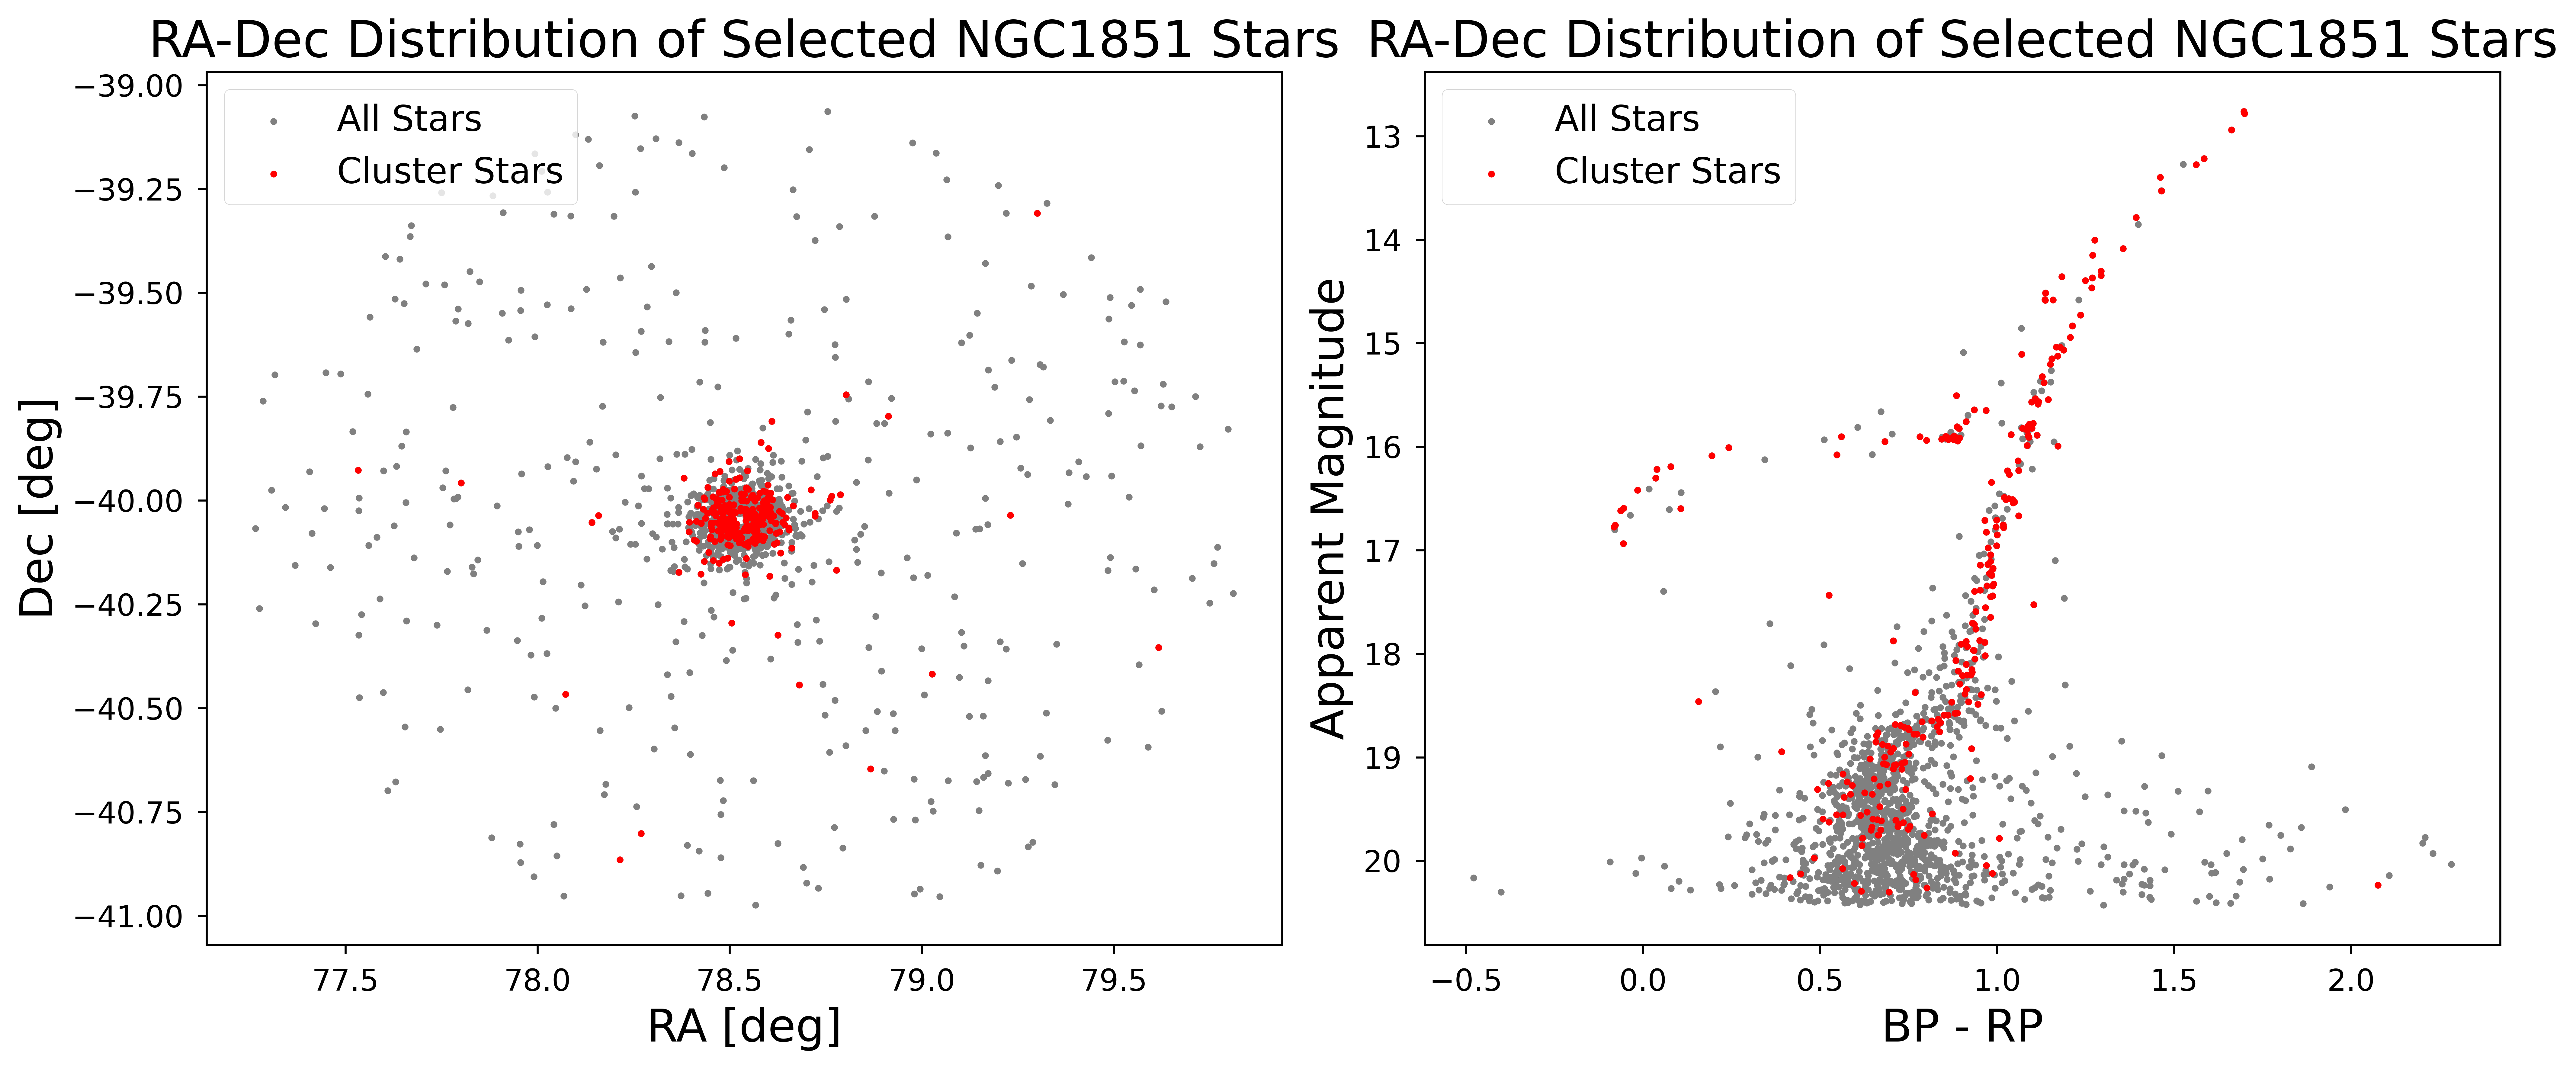

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    NGC1851_data_dered.ra, NGC1851_data_dered.dec, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.ra, NGC1851_pm_filtered.dec, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"RA [deg]", fontsize=18)
axes[0].set_ylabel(r"Dec [deg]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("RA-Dec Distribution of Selected NGC1851 Stars", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ---------------- Display CMD Cut ----------------

axes[1].scatter(
    bp_rp_after, g_after, c="gray", s=6, alpha=1, label="All Stars"
)
axes[1].scatter(
    NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP, NGC1851_pm_filtered.dered_G, c="red",
    s=6, label="Cluster Stars",
)

axes[1].set_xlabel(r"BP - RP", fontsize=18)
axes[1].set_ylabel(r"Apparent Magnitude", fontsize=18)
axes[1].legend(fontsize=14, loc="upper left")
axes[1].set_title("RA-Dec Distribution of Selected NGC1851 Stars", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()



In [102]:
# ---------------- Print Summary of Indetified Cluster Stars ----------------
summary_data = {
    "Cut Criteria": ["Initial Stars (Gaia Source)", "Cluster Stars from no cut (By PM cut)"],
    "Number of Stars": [len(NGC1851_data_dered),f"{len(NGC1851_pm_filtered)}: ({len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100:.1f}%)"]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df)

Cut Criteria Number of Stars
0            Initial Stars (Gaia Source)            1556
1  Cluster Stars from no cut (By PM cut)    257: (16.5%)

## Success of Filtering Stars
### Preposed Cuts

| Parameter                | Value |
|--------------------------|-------|
| Proposed BP-RP Lower Cut | 0.8   |
| Proposed Magnitude Cut   | 18    |
| Proposed Parallax Cut    | -0.1  |
| Proposed Abs Mag Cut     | 5 | 


In [103]:
preposed_BP_RP_lo = 0.8
preposed_mag_cut = 18
preposed_parralax_cut = -0.1
preposed_abs_mag_cut = 5

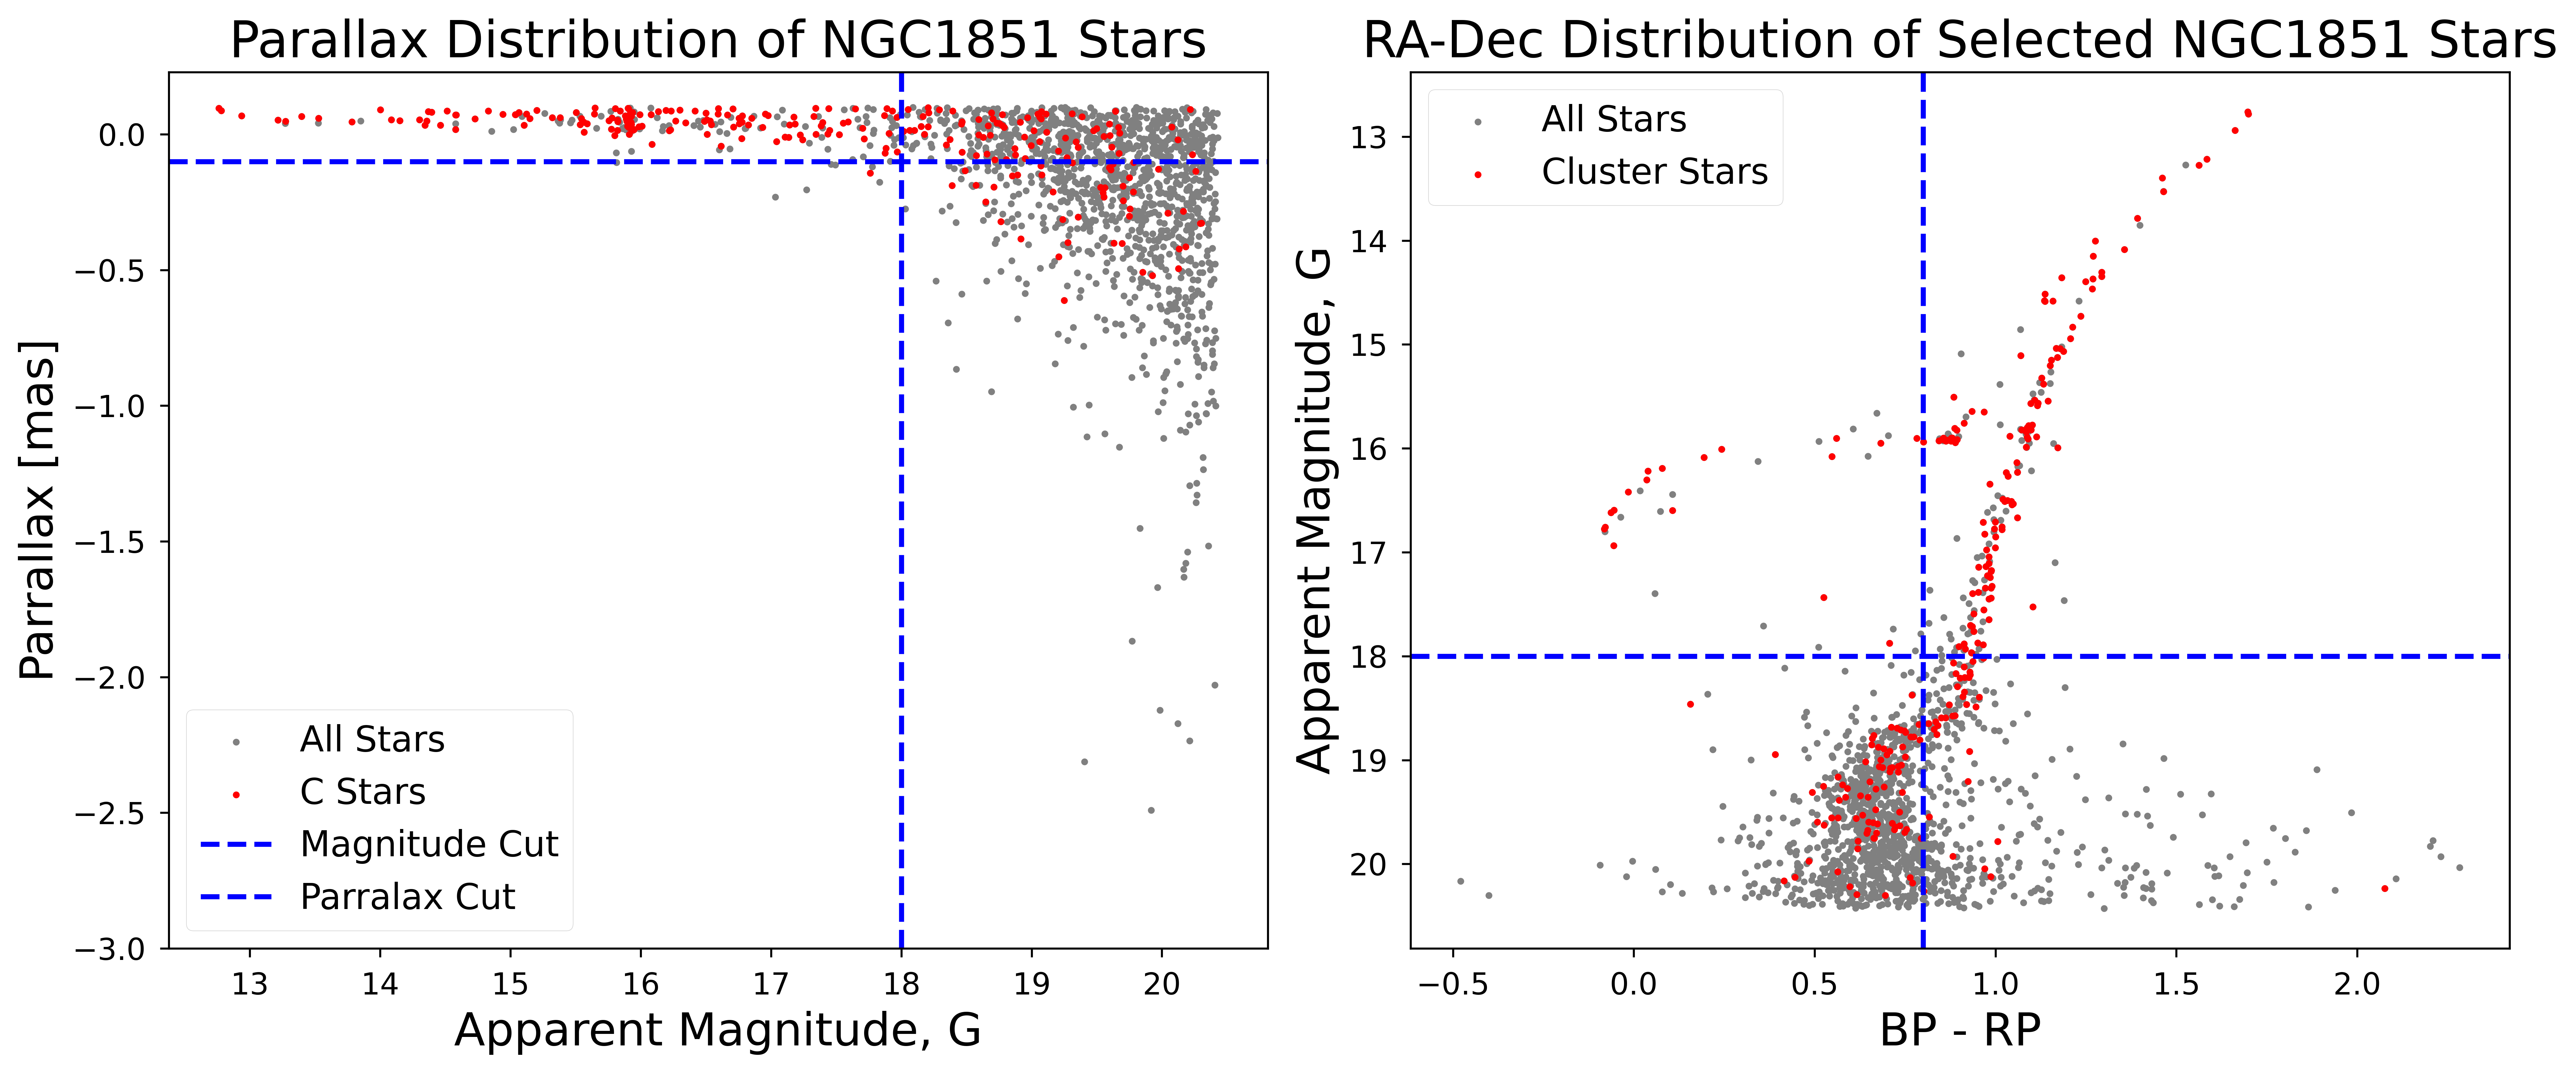

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

bp_rp_filtered, g_filtered = NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP, NGC1851_pm_filtered.dered_G

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.parallax, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.parallax, c="red", s=6, label="C Stars"
)

axes[0].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")
axes[0].axhline(preposed_parralax_cut, color="blue", linestyle="--", linewidth=2, label="Parralax Cut")
axes[0].set_ylim(-3, None)

axes[0].set_xlabel(r"Apparent Magnitude, G", fontsize=18)
axes[0].set_ylabel(r"Parrallax [mas]", fontsize=18)
axes[0].legend(fontsize=14, loc="lower left")
axes[0].set_title("Parallax Distribution of NGC1851 Stars", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ---------------- Display CMD Cut ----------------

axes[1].scatter(
    bp_rp_after, g_after, c="gray", s=6, alpha=1, label="All Stars"
)
axes[1].scatter(
    bp_rp_filtered, g_filtered, c="red",
    s=6, label="Cluster Stars",
)

axes[1].set_xlabel(r"BP - RP", fontsize=18)
axes[1].set_ylabel(r"Apparent Magnitude, G", fontsize=18)
axes[1].legend(fontsize=14, loc="upper left")
axes[1].set_title("RA-Dec Distribution of Selected NGC1851 Stars", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)
axes[1].invert_yaxis()
axes[1].axvline(preposed_BP_RP_lo, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")
axes[1].axhline(preposed_mag_cut, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")

plt.tight_layout()
plt.show()

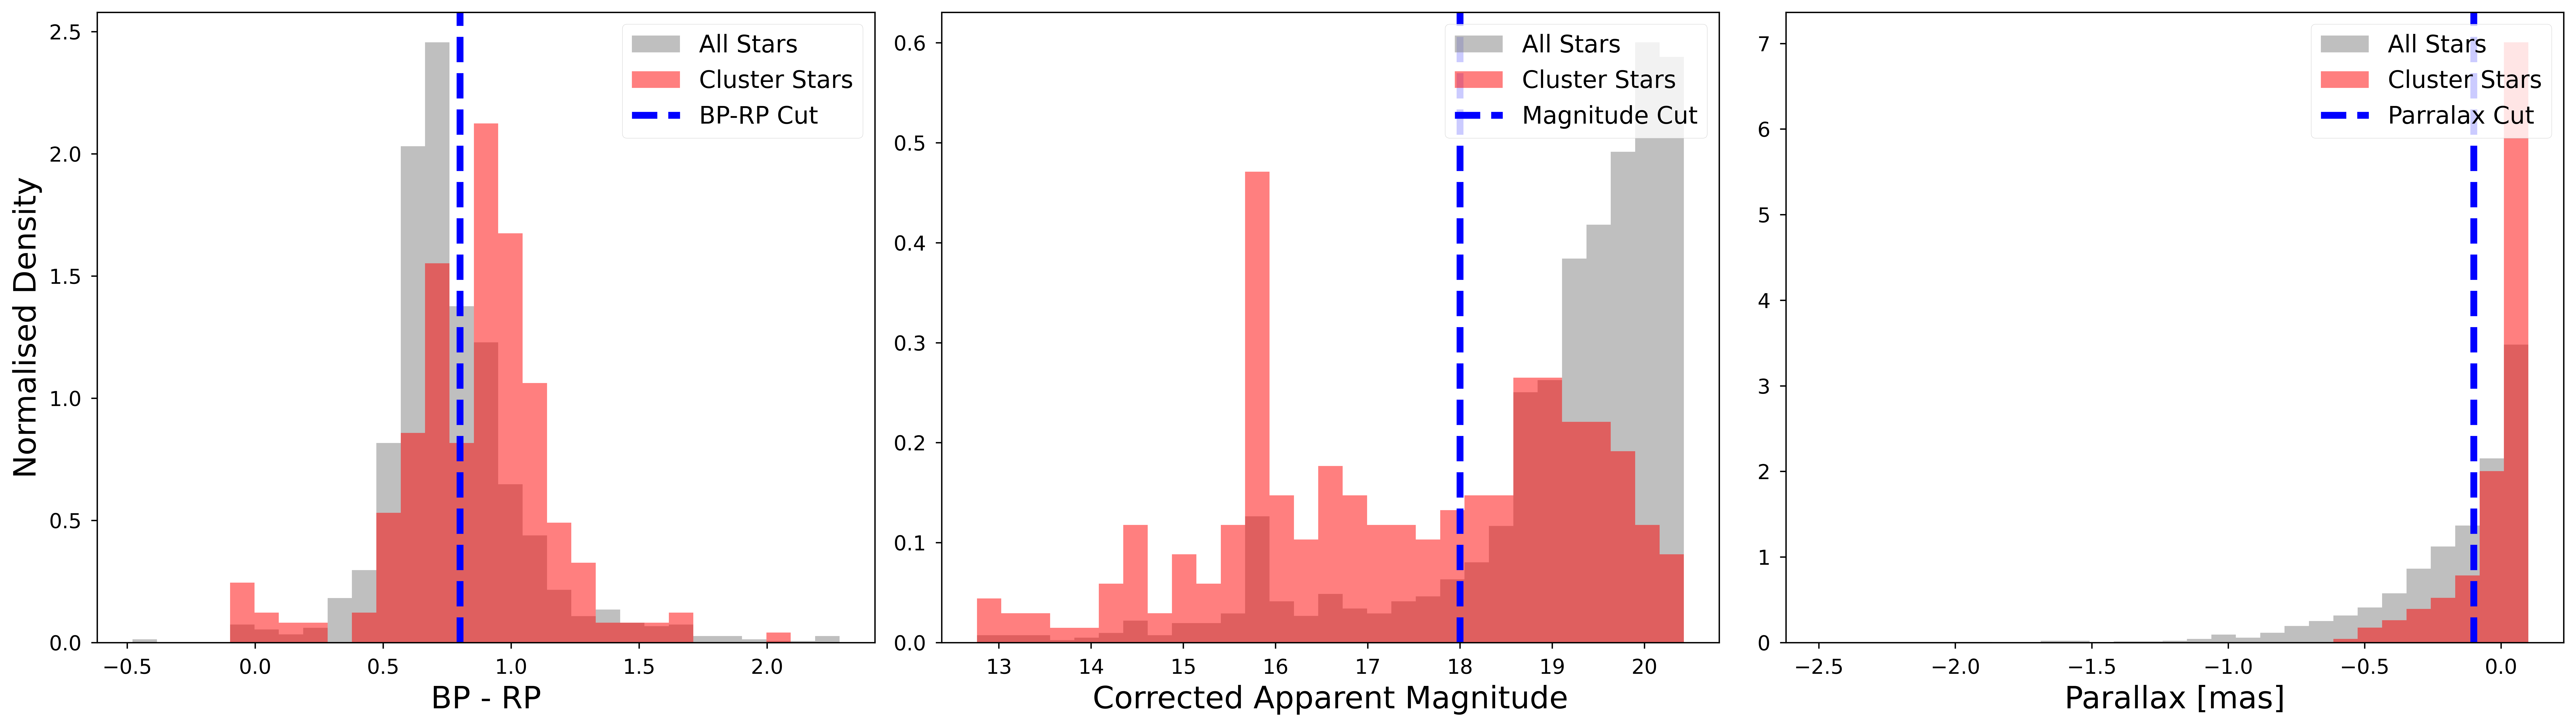

In [105]:
# ---------------- Halo RGB Filter ----------------

fig, axes = plt.subplots(1, 3, figsize=(21, 6), dpi=600)


# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(bp_rp_after.min(), bp_rp_filtered.min()),
                   max(bp_rp_after.max(), bp_rp_filtered.max()), 30)

axes[0].hist(
    bp_rp_after, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[0].hist(
    bp_rp_filtered, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[0].axvline(preposed_BP_RP_lo, color="blue", linestyle="--", linewidth=4, label="BP-RP Cut")
axes[0].set_xlabel("BP - RP", fontsize=18)
axes[0].set_ylabel("Normalised Density", fontsize=18)
axes[0].legend(fontsize=14, loc="upper right")
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.dered_G.min(), NGC1851_pm_filtered.dered_G.min()),
                   max(NGC1851_data_dered.dered_G.max(), NGC1851_pm_filtered.dered_G.max()), 30)

axes[1].hist(
    NGC1851_data_dered.dered_G, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.dered_G, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=4, label="Magnitude Cut")

axes[1].set_xlabel("Corrected Apparent Magnitude", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.parallax.min(), NGC1851_pm_filtered.parallax.min()),
                   max(NGC1851_data_dered.parallax.max(), NGC1851_pm_filtered.parallax.max()), 30)

axes[2].hist(
    NGC1851_data_dered.parallax, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[2].hist(
    NGC1851_pm_filtered.parallax, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[2].axvline(preposed_parralax_cut, color="blue", linestyle="--", linewidth=4, label="Parralax Cut")
axes[2].set_xlabel("Parallax [mas]", fontsize=18)
axes[2].legend(fontsize=14, loc="upper right")
axes[2].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


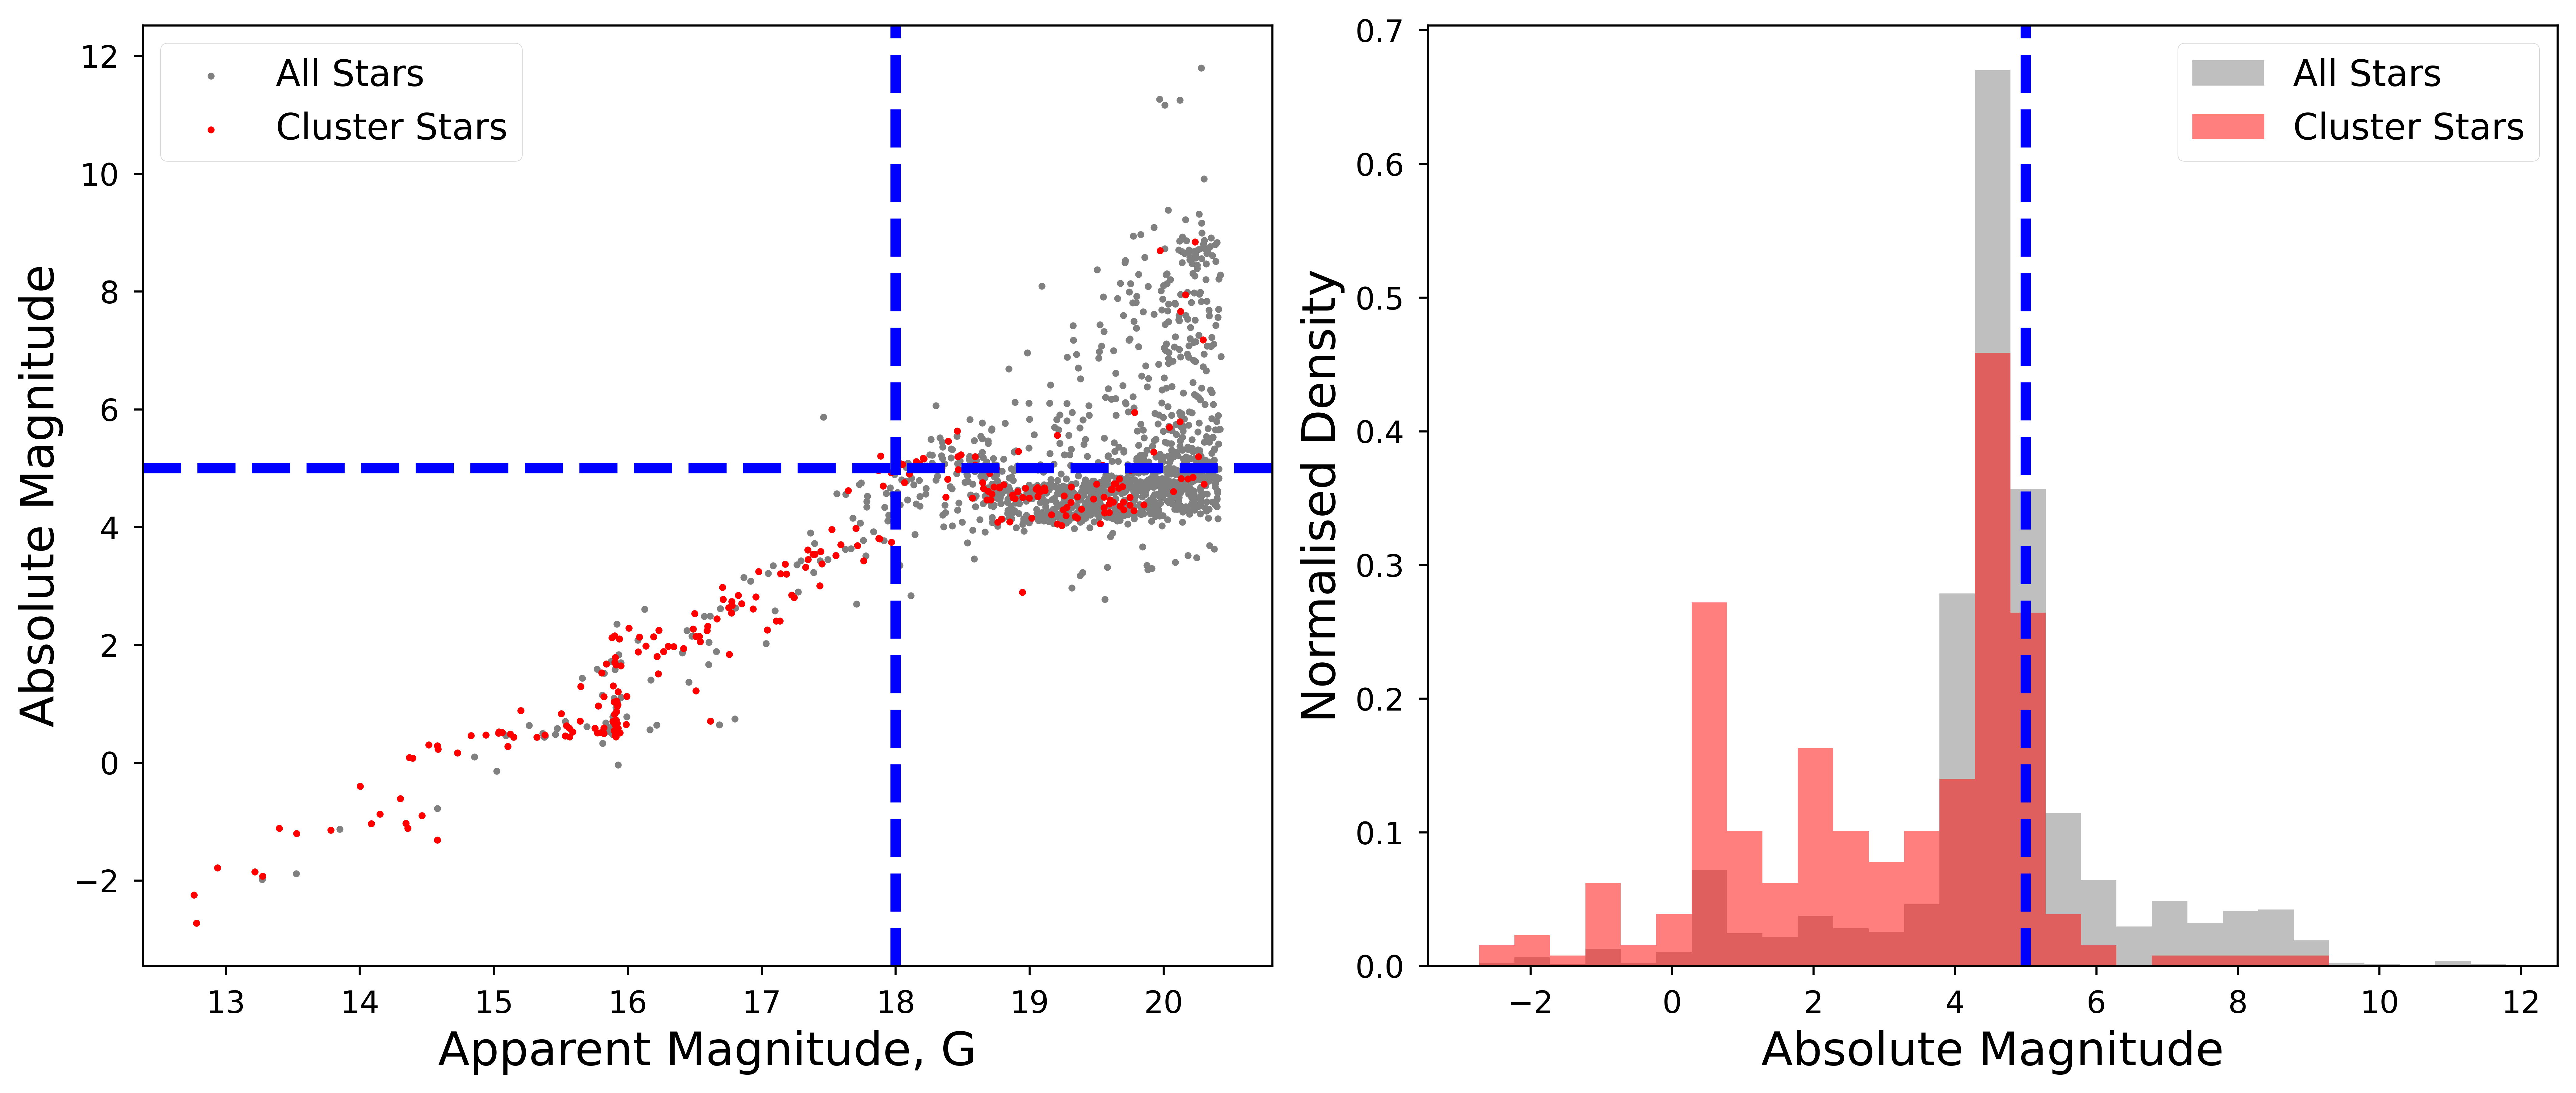

Cut Criteria  Total Number of Stars  No. of Cluster Stars  \
0                  No Cut                   1556                   257   
1      With Magnitude Cut                    239                   143   
2  With Abs Magnitude Cut                   1112                   226   
3               Both Cuts                    235                   142   

  Percentage of Cluster Stars Percentage Improvement From Cut  
0                       16.5%                             N/A  
1                       59.8%                           43.3%  
2                       20.3%                            3.8%  
3                       60.4%                           43.9%

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: Absolute Magnitude vs Corrected G Magnitude ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.abs_G, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.abs_G, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Apparent Magnitude, G", fontsize=18)
axes[0].set_ylabel(r"Absolute Magnitude", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].tick_params(axis="both", labelsize=12)

axes[0].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=4, label="Magnitude Cut")
axes[0].axhline(preposed_abs_mag_cut, color="blue", linestyle="--", linewidth=4, label="Abs Mag Cut")

# ------------ Display Normalised Absolute Magnitude Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.abs_G.min(), NGC1851_pm_filtered.abs_G.min()),
                   max(NGC1851_data_dered.abs_G.max(), NGC1851_pm_filtered.abs_G.max()), 30)

axes[1].hist(
    NGC1851_data_dered.abs_G, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.abs_G, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Absolute Magnitude", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].tick_params(axis="both", labelsize=12)
axes[1].axvline(preposed_abs_mag_cut, color="blue", linestyle="--", linewidth=4, label="Abs Mag Cut")
plt.tight_layout()
plt.show()


# Comparison on filters
# Magnitude Cut
NGC1851_data_dered_mag_cut = NGC1851_data_dered[NGC1851_data_dered.dered_G < preposed_mag_cut]
NGC1851_pm_filtered_mag_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.dered_G < preposed_mag_cut]

# Abs Mag Cut
NGC1851_data_dered_abs_mag_cut = NGC1851_data_dered[NGC1851_data_dered.abs_G < preposed_abs_mag_cut]
NGC1851_pm_filtered_abs_mag_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.abs_G < preposed_abs_mag_cut]

# All Cuts
NGC1851_data_dered_all_cuts_mag = NGC1851_data_dered[
    (NGC1851_data_dered.dered_G < preposed_mag_cut) &
    (NGC1851_data_dered.abs_G < preposed_abs_mag_cut)
]
NGC1851_pm_filtered_all_cuts_mag = NGC1851_pm_filtered[
    (NGC1851_pm_filtered.dered_G < preposed_mag_cut) &
    (NGC1851_pm_filtered.abs_G < preposed_abs_mag_cut)
]

summary_data_mag = {
    "Cut Criteria": ["No Cut", "With Magnitude Cut", "With Abs Magnitude Cut", "Both Cuts"],
    "Total Number of Stars": [
        len(NGC1851_data_dered),
        len(NGC1851_data_dered_mag_cut),
        len(NGC1851_data_dered_abs_mag_cut),
        len(NGC1851_data_dered_all_cuts_mag)
    ],
    "No. of Cluster Stars": [
        len(NGC1851_pm_filtered),
        len(NGC1851_pm_filtered_mag_cut),
        len(NGC1851_pm_filtered_abs_mag_cut),
        len(NGC1851_pm_filtered_all_cuts_mag)
    ],
    "Percentage of Cluster Stars": [
        f"{len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_mag_cut)/len(NGC1851_data_dered_mag_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_abs_mag_cut)/len(NGC1851_data_dered_abs_mag_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_all_cuts_mag)/len(NGC1851_data_dered_all_cuts_mag)*100:.1f}%"
    ],
    "Percentage Improvement From Cut": [
        "N/A",
        f"{(len(NGC1851_pm_filtered_mag_cut)/len(NGC1851_data_dered_mag_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_abs_mag_cut)/len(NGC1851_data_dered_abs_mag_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_all_cuts_mag)/len(NGC1851_data_dered_all_cuts_mag)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%"
    ]
}
summary_df = pd.DataFrame(summary_data_mag)
display(summary_df)

In [107]:
NGC1851_pm_filtered = NGC1851_data_dered[
    (NGC1851_data_dered.pmra > pmra_lim_lo) & (NGC1851_data_dered.pmra < pmra_lim_hi) &
    (NGC1851_data_dered.pmdec > pmdec_lim_lo) & (NGC1851_data_dered.pmdec < pmdec_lim_hi)
]

In [108]:
# ---------------- Print Summary of Star Numbers after cut ----------------
# Magnitude Cut
NGC1851_data_dered_mag_cut = NGC1851_data_dered[NGC1851_data_dered.dered_G < preposed_mag_cut]
NGC1851_pm_filtered_mag_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.dered_G < preposed_mag_cut]

# Lower BP-RP Cut
NGC1851_data_dered_bp_rp_lo_cut = NGC1851_data_dered[NGC1851_data_dered.dered_BP - NGC1851_data_dered.dered_RP > preposed_BP_RP_lo]
NGC1851_pm_filtered_bp_rp_lo_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP > preposed_BP_RP_lo]

# Parallax Cut
NGC1851_data_dered_parallax_cut = NGC1851_data_dered[NGC1851_data_dered.parallax > preposed_parralax_cut]
NGC1851_pm_filtered_parallax_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.parallax > preposed_parralax_cut]

# Abs Mag Cut
NGC1851_data_dered_abs_mag_cut = NGC1851_data_dered[NGC1851_data_dered.abs_G < preposed_abs_mag_cut]
NGC1851_pm_filtered_abs_mag_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.abs_G < preposed_abs_mag_cut]

# All Cuts
NGC1851_data_dered_all_cuts = NGC1851_data_dered[
    (NGC1851_data_dered.dered_G < preposed_mag_cut) &
    (NGC1851_data_dered.dered_BP - NGC1851_data_dered.dered_RP > preposed_BP_RP_lo) &
    (NGC1851_data_dered.parallax > preposed_parralax_cut) &
    (NGC1851_data_dered.abs_G < preposed_abs_mag_cut)
]
NGC1851_pm_filtered_all_cuts = NGC1851_pm_filtered[
    (NGC1851_pm_filtered.dered_G < preposed_mag_cut) &
    (NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP > preposed_BP_RP_lo) &
    (NGC1851_pm_filtered.parallax > preposed_parralax_cut) &
    (NGC1851_pm_filtered.abs_G < preposed_abs_mag_cut)
]

summary_data = {
    "Cut Criteria": ["No Cut", "With Magnitude Cut", "With Abs Mag Cut", "With BP-RP Lower Cut", "With Parallax Cut", "All Cuts"],
    "Total Number of Stars": [
        len(NGC1851_data_dered),
        len(NGC1851_data_dered_mag_cut),
        len(NGC1851_data_dered_abs_mag_cut),
        len(NGC1851_data_dered_bp_rp_lo_cut),
        len(NGC1851_data_dered_parallax_cut),
        len(NGC1851_data_dered_all_cuts)
    ],
    "No. of Cluster Stars": [
        len(NGC1851_pm_filtered),
        len(NGC1851_pm_filtered_mag_cut),
        len(NGC1851_pm_filtered_abs_mag_cut),
        len(NGC1851_pm_filtered_bp_rp_lo_cut),
        len(NGC1851_pm_filtered_parallax_cut),
        len(NGC1851_pm_filtered_all_cuts)
    ],
    "Percentage of Cluster Stars": [
        f"{len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_mag_cut)/len(NGC1851_data_dered_mag_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_abs_mag_cut)/len(NGC1851_data_dered_abs_mag_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_bp_rp_lo_cut)/len(NGC1851_data_dered_bp_rp_lo_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_parallax_cut)/len(NGC1851_data_dered_parallax_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_all_cuts)/len(NGC1851_data_dered_all_cuts)*100:.1f}%"
    ],
    "Percentage Improvement From Cut": [
        "N/A",
        f"{(len(NGC1851_pm_filtered_mag_cut)/len(NGC1851_data_dered_mag_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_abs_mag_cut)/len(NGC1851_data_dered_abs_mag_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_bp_rp_lo_cut)/len(NGC1851_data_dered_bp_rp_lo_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_parallax_cut)/len(NGC1851_data_dered_parallax_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_all_cuts)/len(NGC1851_data_dered_all_cuts)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

Cut Criteria  Total Number of Stars  No. of Cluster Stars  \
0                No Cut                   1556                   257   
1    With Magnitude Cut                    239                   143   
2      With Abs Mag Cut                   1112                   226   
3  With BP-RP Lower Cut                    562                   160   
4     With Parallax Cut                    829                   211   
5              All Cuts                    193                   123   

  Percentage of Cluster Stars Percentage Improvement From Cut  
0                       16.5%                             N/A  
1                       59.8%                           43.3%  
2                       20.3%                            3.8%  
3                       28.5%                           12.0%  
4                       25.5%                            8.9%  
5                       63.7%                           47.2%

### Investigating Validity of other potential Cuts (Surface Temp and Log G from Gaia)
- These are found not to be viable due to the inaccuracy of this data from gaia

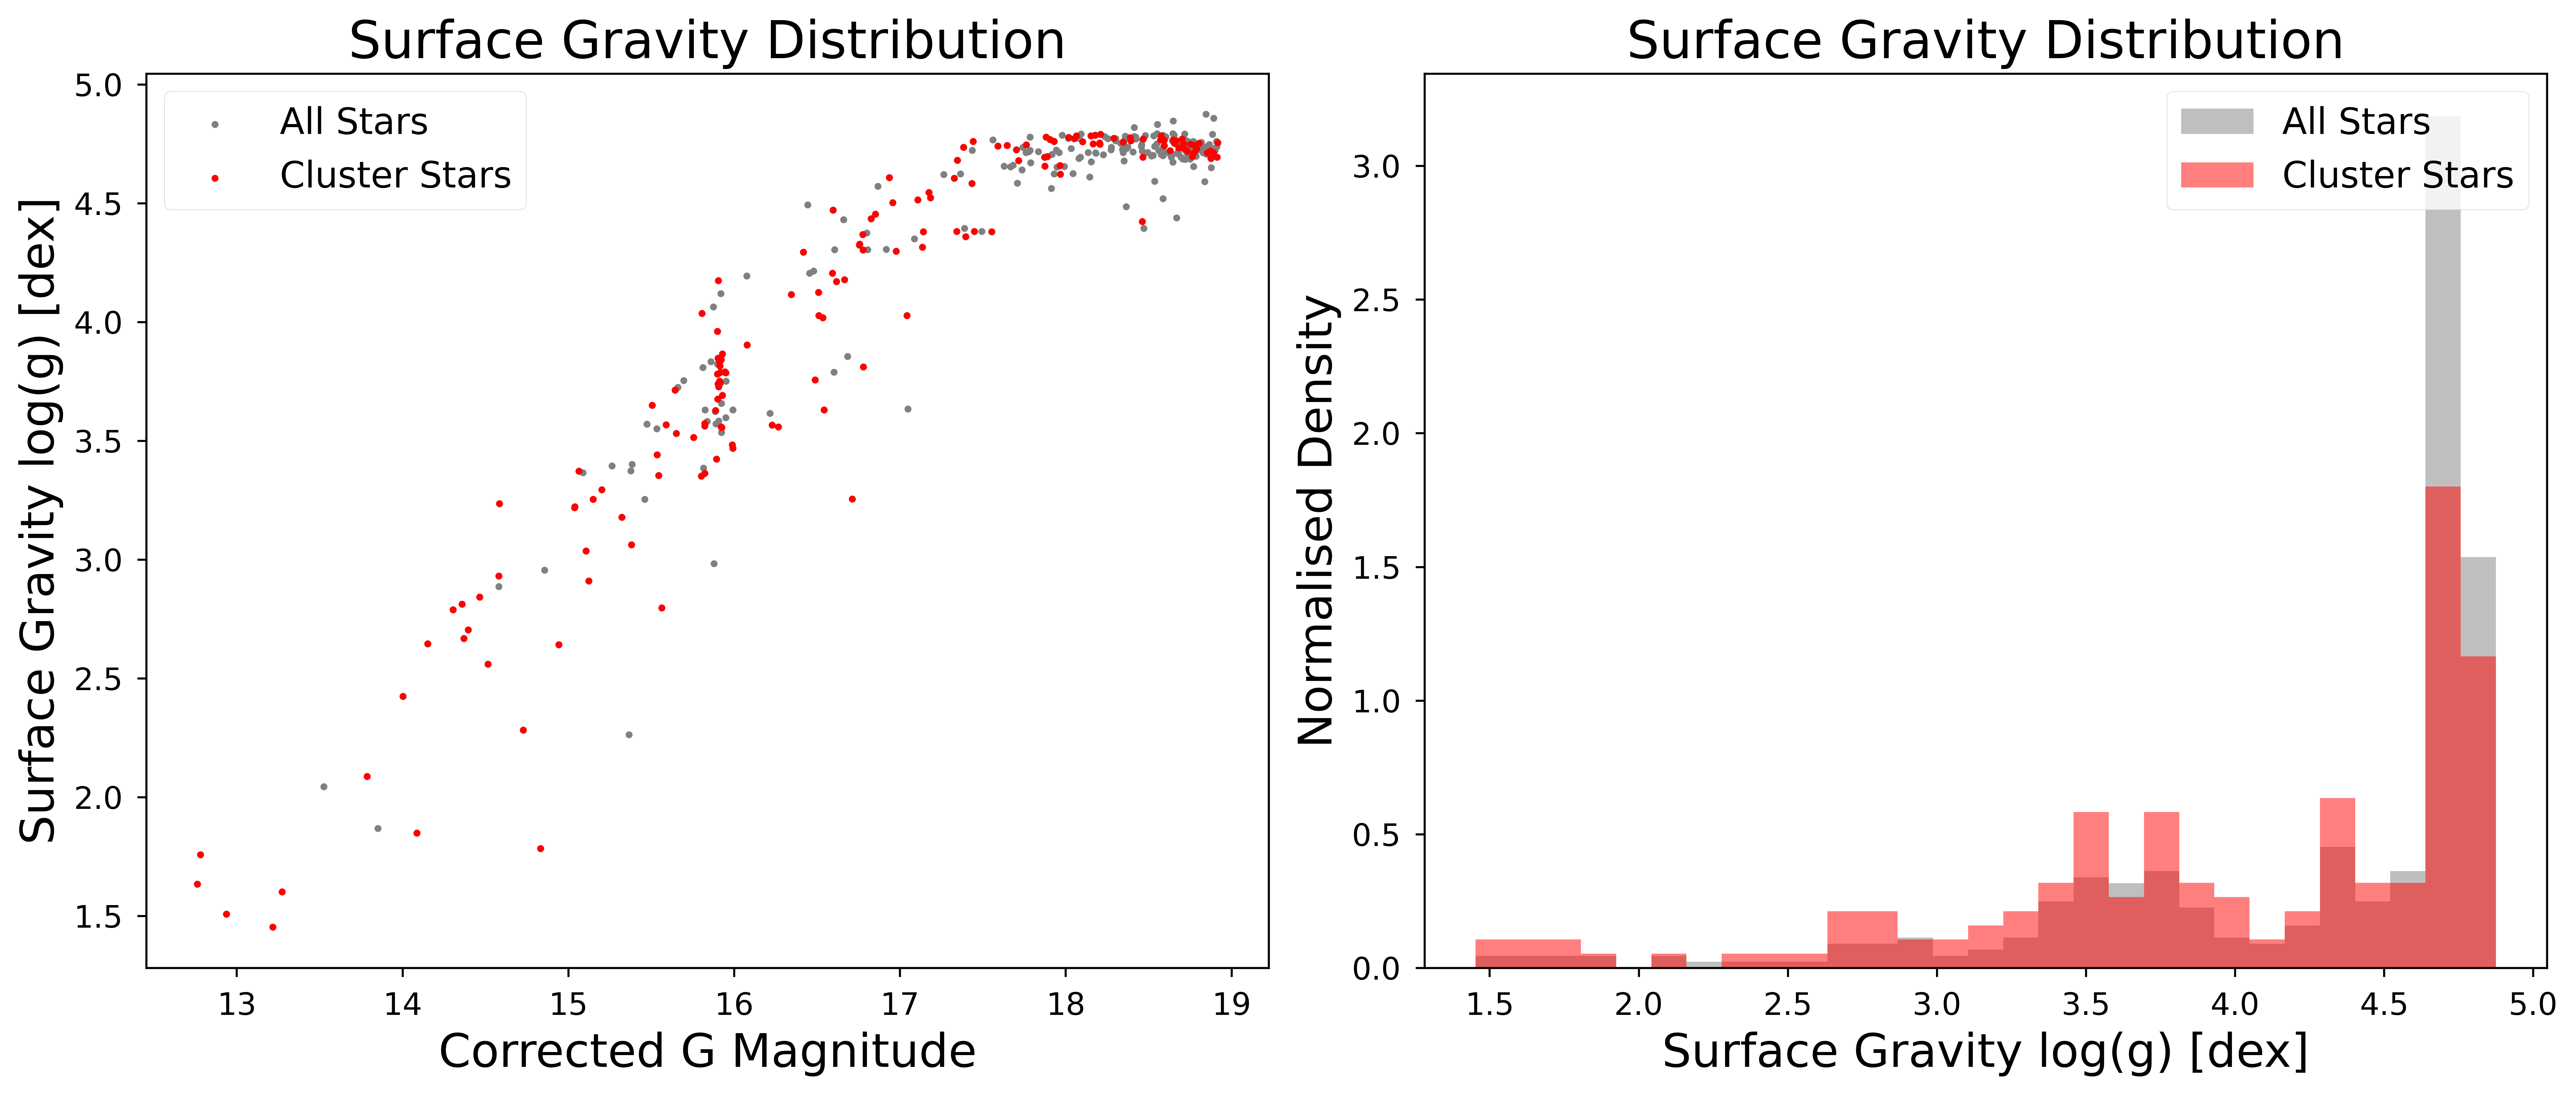

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: logg_gspphot vs Corrected G Magnitude ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.logg_gspphot, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.logg_gspphot, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Surface Gravity log(g) [dex]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Surface Gravity Distribution", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized logg_gspphot Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.logg_gspphot.min(), NGC1851_pm_filtered.logg_gspphot.min()),
                   max(NGC1851_data_dered.logg_gspphot.max(), NGC1851_pm_filtered.logg_gspphot.max()), 30)

axes[1].hist(
    NGC1851_data_dered.logg_gspphot, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.logg_gspphot, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Surface Gravity log(g) [dex]", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Surface Gravity Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

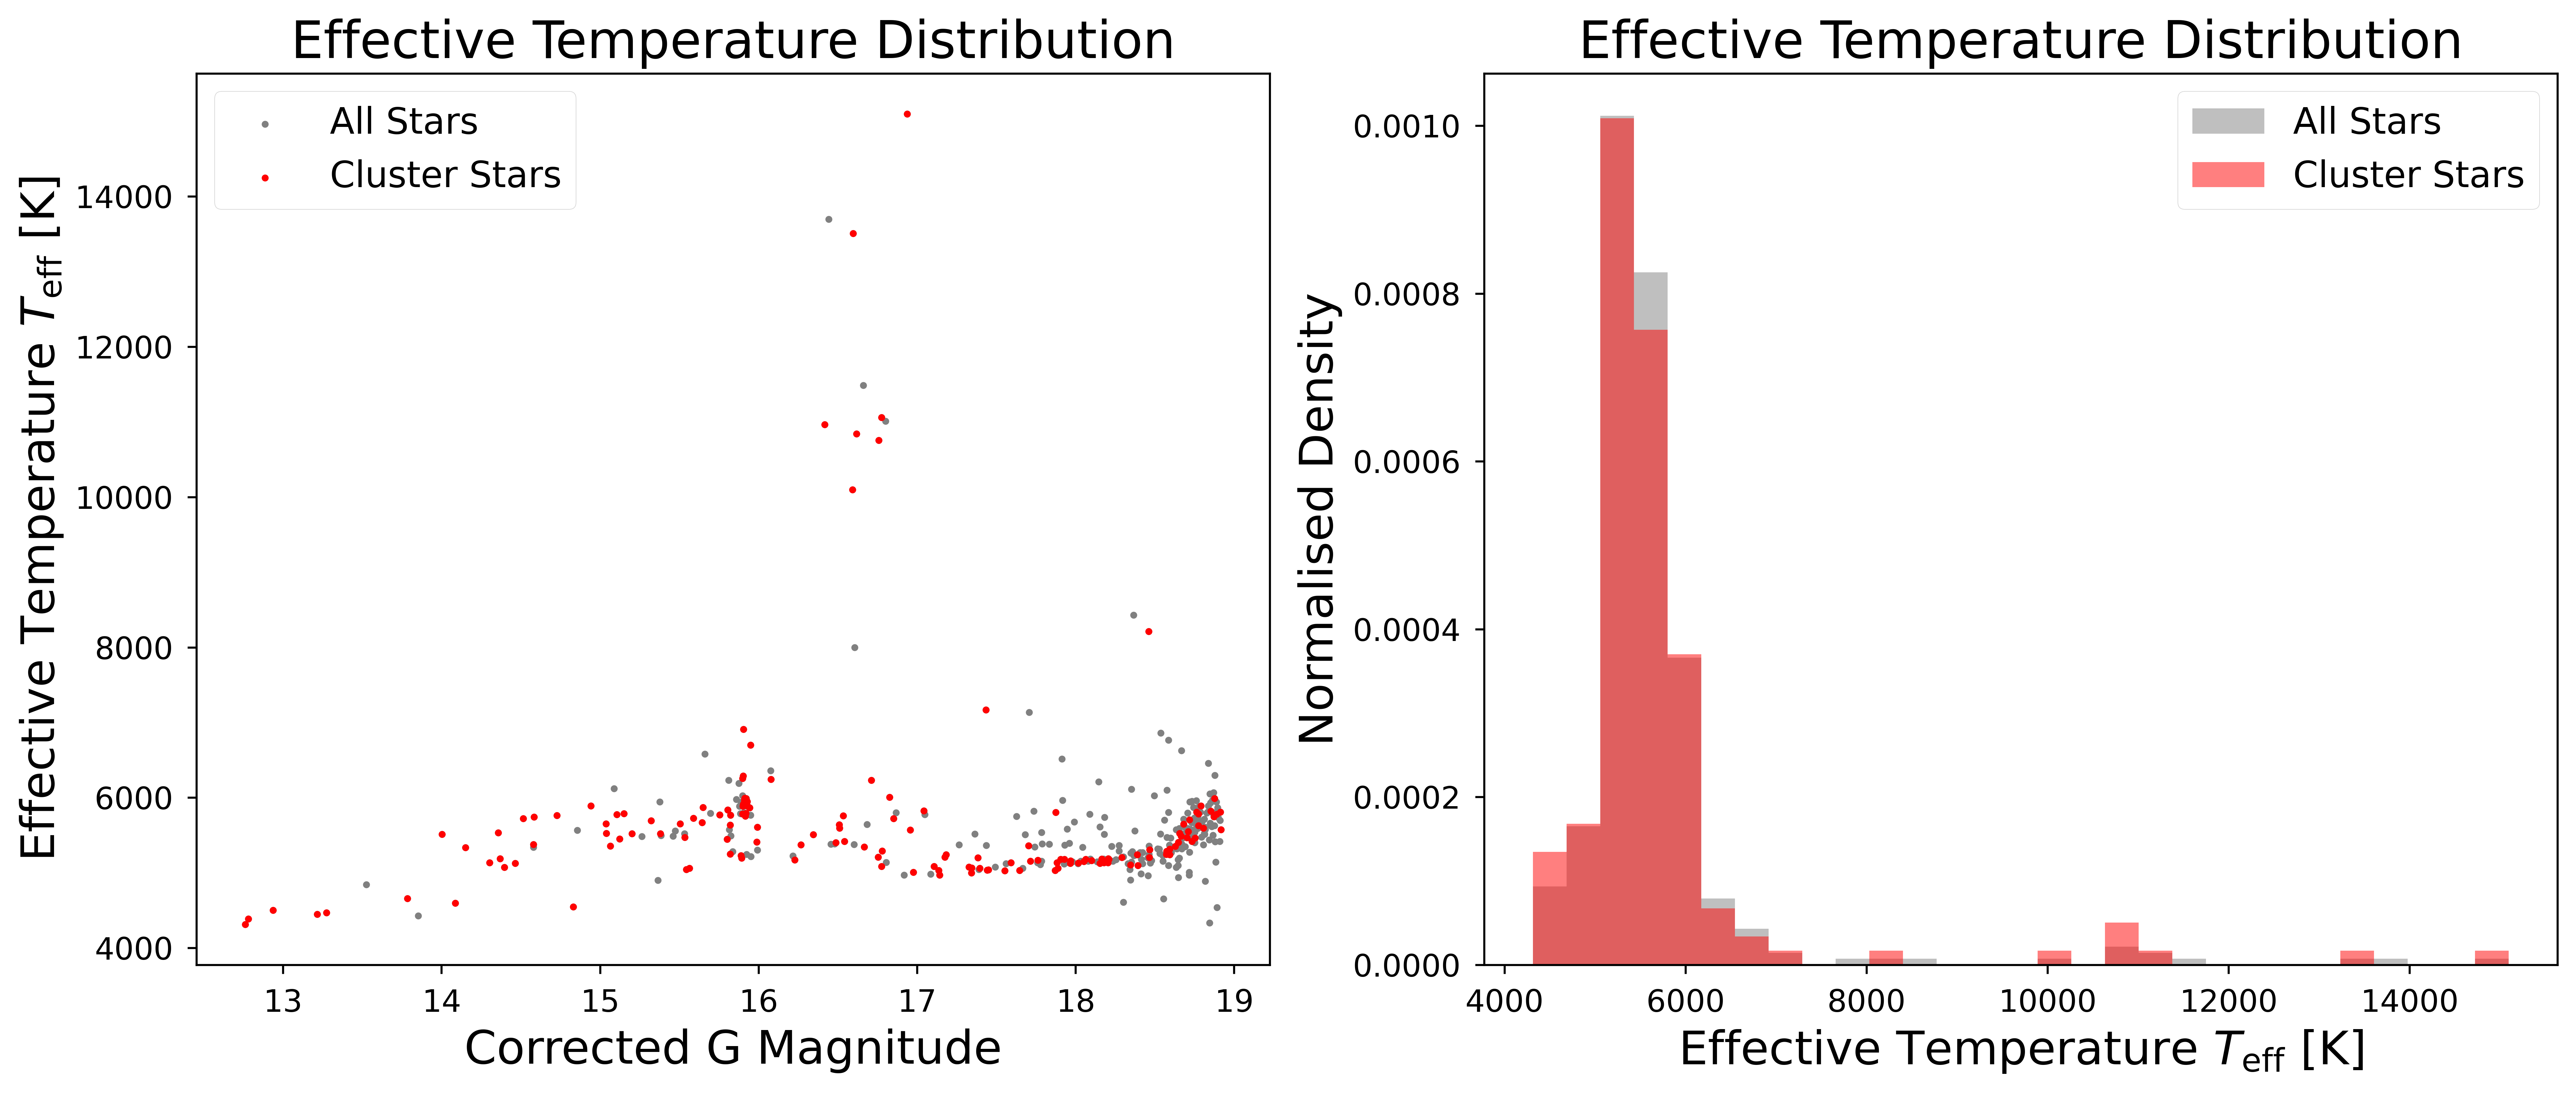

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: teff_gspphot vs Corrected G Magnitude ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.teff_gspphot, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.teff_gspphot, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Effective Temperature $T_{\mathrm{eff}}$ [K]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Effective Temperature Distribution", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized teff_gspphot Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.teff_gspphot.min(), NGC1851_pm_filtered.teff_gspphot.min()),
                   max(NGC1851_data_dered.teff_gspphot.max(), NGC1851_pm_filtered.teff_gspphot.max()), 30)

axes[1].hist(
    NGC1851_data_dered.teff_gspphot, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.teff_gspphot, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Effective Temperature $T_{\mathrm{eff}}$ [K]", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Effective Temperature Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

### Investigating the Bailer Jones Distances

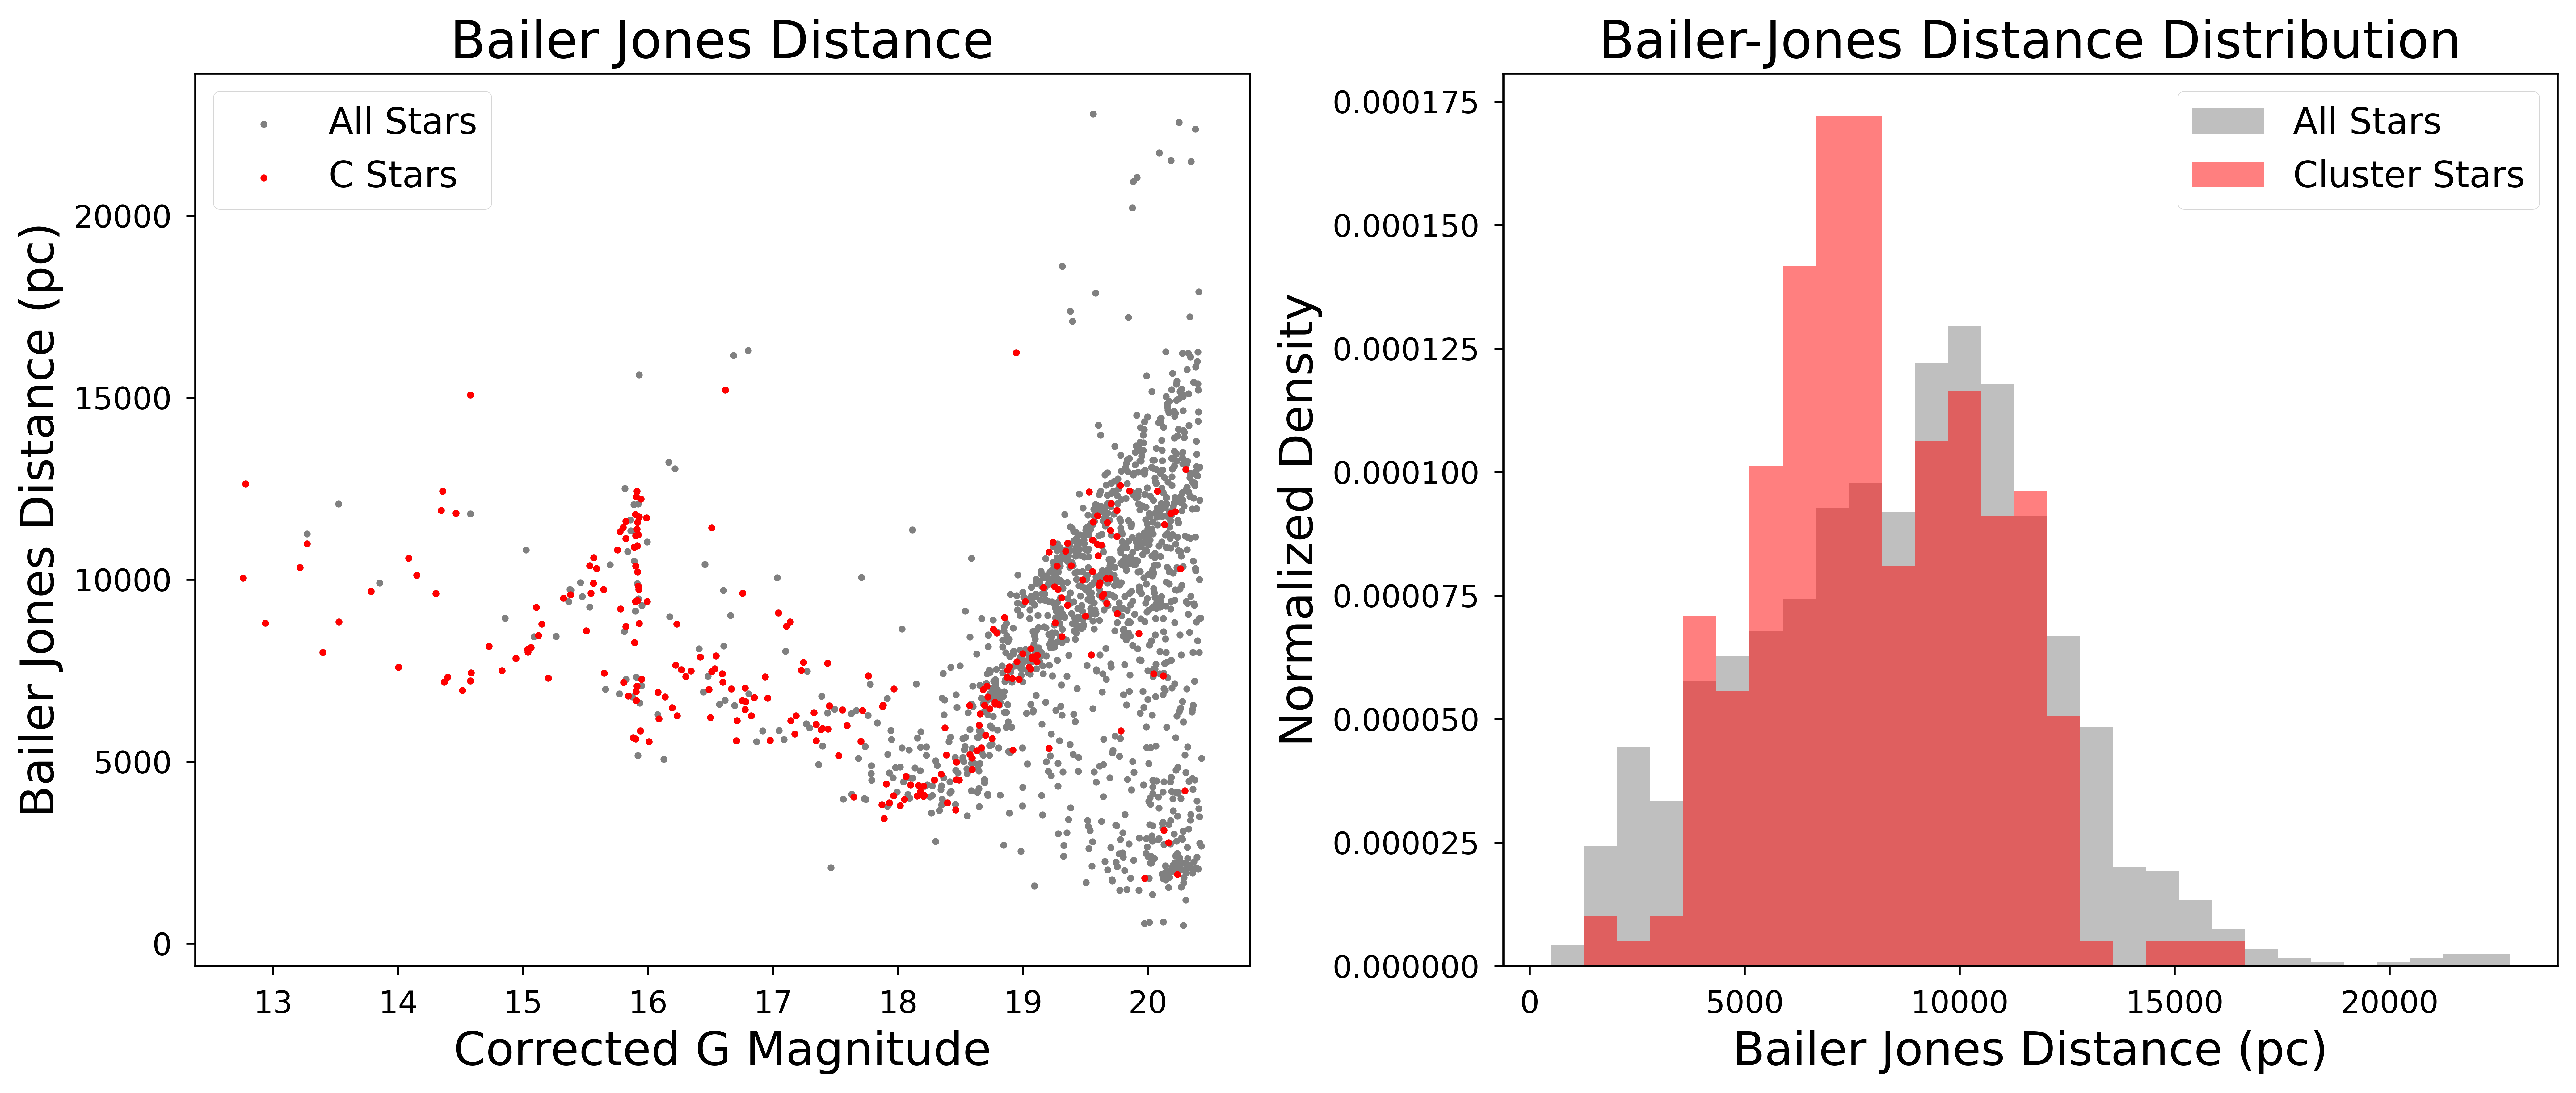

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.r_med_photogeo, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.r_med_photogeo, c="red", s=6, label="C Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Bailer Jones Distance (pc)", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Bailer Jones Distance", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.r_med_photogeo.min(), NGC1851_pm_filtered.r_med_photogeo.min()),
                   max(NGC1851_data_dered.r_med_photogeo.max(), NGC1851_pm_filtered.r_med_photogeo.max()), 30)

axes[1].hist(
    NGC1851_data_dered.r_med_photogeo, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.r_med_photogeo, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel("Bailer Jones Distance (pc)", fontsize=18)
axes[1].set_ylabel("Normalized Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Bailer-Jones Distance Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()
